**Unsupervised Learning and Linear Programming**

Pratik Relekar (pratik.relekar@gmail.com)



In [ ]:
import pandas as pd

# Read the supplier audit data
audit_data = pd.read_csv('SupplierAuditData.csv')
audit_data




,Month,SUP_ID,Defects,Delivery,Unit_Cost,Flexibility
0,1,SUP_1,16.6,5,25.62,5.5
1,2,SUP_1,4.7,11,26.61,1.7
2,3,SUP_1,5.1,1,33.81,0.6
3,4,SUP_1,17.4,7,33.62,3.2
4,5,SUP_1,4.5,5,42.11,2.5
...,...,...,...,...,...,...
1795,56,SUP_26,24.5,8,14.38,7.5
1796,57,SUP_26,29.9,3,23.79,14.5
1797,58,SUP_26,27.9,3,23.96,7.6
1798,59,SUP_26,22.8,2,18.69,12.5


In [ ]:
# Group the data by supplier
grouped_data = audit_data.groupby('SUP_ID')

# Calculate the required variables
average_defects = grouped_data['Defects'].mean()
std_defects = grouped_data['Defects'].std()
average_cost = grouped_data['Unit_Cost'].mean()
std_cost = grouped_data['Unit_Cost'].std()
average_delivery_time = grouped_data['Delivery'].mean()
average_flexibility = grouped_data['Flexibility'].mean()

# Create a new data table
data_table = pd.DataFrame({
    'average_defects': average_defects,
    'std_defects': std_defects,
    'average_cost': average_cost,
    'std_cost': std_cost,
    'average_delivery_time': average_delivery_time,
    'average_flexibility': average_flexibility
})

In [ ]:
data_table

,average_defects,std_defects,average_cost,std_cost,average_delivery_time,average_flexibility
SUP_ID,,,,,,
SUP_1,9.345000,4.578262,30.534167,4.960600,4.750000,2.058333
SUP_10,9.855000,5.328193,19.745333,4.772947,34.950000,1.825000
SUP_11,19.711667,11.547113,25.355417,7.257808,4.800000,5.615000
SUP_12,9.873333,1.013781,35.006000,1.047575,4.933333,1.848333
SUP_13,31.048333,4.458832,19.969833,2.087725,35.283333,8.913333
SUP_14,29.780000,5.157184,20.470500,2.093247,35.516667,1.966667
SUP_15,9.245000,4.892971,20.254000,4.611547,35.233333,2.098333
SUP_16,19.787500,11.258808,24.984750,6.583803,4.700000,5.392500
SUP_17,10.018333,1.148100,35.224000,1.004465,4.900000,1.853333


In [ ]:
from sklearn.cluster import KMeans

# Set the number of clusters
k = 4

# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the algorithm to the data table
kmeans.fit(data_table)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Interpret the cluster centers


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 - 
First cluster of suppliers seems to have low average defects. However, high standard deviation in unit cost shows 
higher variation in unit cost for these suppliers. Additionally, these suppliers have a relatively long average delivery time.

Cluster 2 - 
The suppliers in this cluster have a lower range of defects, typically between 8-11, but their unit cost is higher compared to other suppliers.
The average delivery time is less.

Cluster 3 - 
The suppliers in this group have the most variation in their unit cost. Low delivery time and high average flexibility are
the key characteristics of this cluster.

Cluster 4 - 
This cluster of suppliers has the highest average number of defects. Average delivery time is relatively high.
#

In [ ]:
print(cluster_centers)

[[ 9.825       4.75468408 20.1497      5.17421667 35.58333333  2.00466667]
 [ 9.85        1.60820337 34.27597222  1.69315054  4.84444444  2.02444444]
 [21.863       9.96242626 24.04656667  6.71988834  4.76833333  6.192     ]
 [30.2395      5.03296047 20.19926667  2.00217173 34.84        5.5975    ]]


In [ ]:
kmeans.labels_

array([1, 0, 2, 1, 3, 3, 0, 2, 1, 3, 3, 1, 0, 2, 1, 3, 3, 0, 2, 3, 3, 0,
       2, 1, 3, 3], dtype=int32)

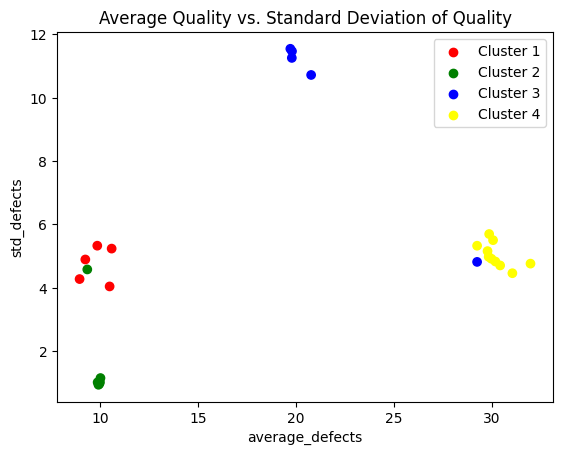

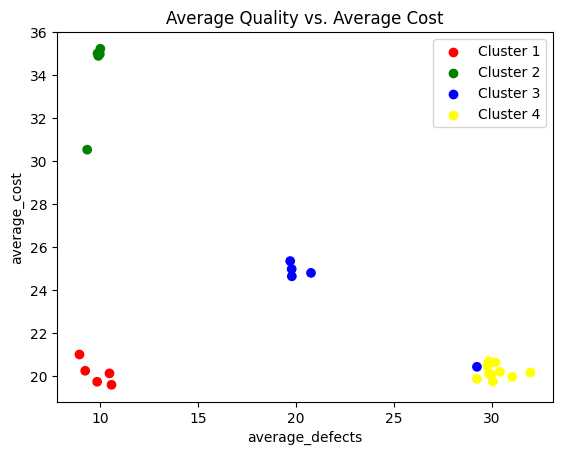

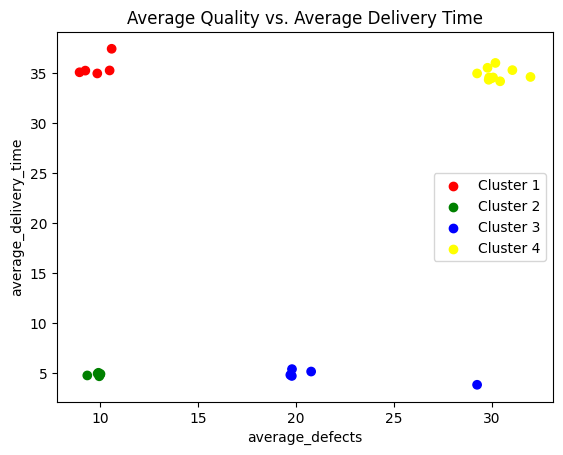

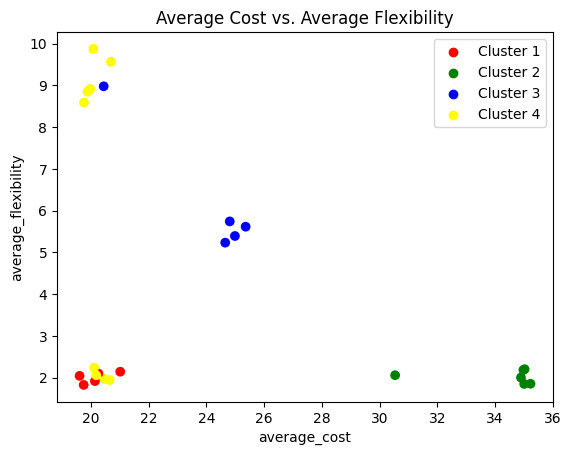

In [ ]:
import matplotlib.pyplot as plt

# Get the cluster labels
labels = kmeans.labels_

# Create the scatter plots
def plot_clusters(x_axis, y_axis, title):
    colors = ['red', 'green', 'blue', 'yellow']
    plt.scatter(data_table[x_axis], data_table[y_axis], c=[colors[label] for label in labels])
    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    # Adding legend
    for i in range(4):
        plt.scatter([], [], c=colors[i], label=f'Cluster {i+1}')
    plt.legend()
    # Show the plot
    plt.show()



plot_clusters('average_defects', 'std_defects', 'Average Quality vs. Standard Deviation of Quality')
plot_clusters('average_defects', 'average_cost', 'Average Quality vs. Average Cost')
plot_clusters('average_defects', 'average_delivery_time', 'Average Quality vs. Average Delivery Time')
plot_clusters('average_cost', 'average_flexibility', 'Average Cost vs. Average Flexibility')

Graph1: Average quality vs Standard deviation of quality
Cluster 1 and 2 have lower average defects per supplier. Cluster 2 has lower standard deviation. Therefore, it can be concluded that suppliers in cluster 2 provide highest quality.

Graph2: Average quality versus Average costs
Cluster 1 provides lower average defects with lowest average cost. Thus, supplies from cluster 2 suppliers can be considered highest in quality given average unit cost.

Graph3: Average Quality versus Average Delivery Time
Cluster 1 and 4 have high delivery time. Suppliers from cluster 2 offers lower delivery time and higher quality.
Notice that in Graph2 we concluded suppliers from cluster 1 as cost effective suppliers, but they offer higher delivery time. 
Therefore, one has decide his weightage between delivery time and cost to compare cluster 1 and cluster 2.

Graph4: Average cost versus average flexibility
Cluster 4 offers highest flexibility given lowest average cost.


In [ ]:
# Read the supplier characteristics data
characteristics_data = pd.read_csv('SupplierCharacteristics.csv')
characteristics_data

,SUP_ID,Location,Partnership,Size
0,SUP_1,D,I,L
1,SUP_10,G,I,L
2,SUP_11,D,I,M
3,SUP_12,D,P,L
4,SUP_13,G,I,S
5,SUP_14,G,I,L
6,SUP_15,G,I,L
7,SUP_16,D,I,M
8,SUP_17,D,P,L
9,SUP_18,G,I,S


In [ ]:
 cluster_assignments = pd.concat([data_table.reset_index(), pd.DataFrame(labels, columns=['labels'])], axis=1)
 final_cluster = cluster_assignments.merge(characteristics_data, on = 'SUP_ID', how = 'inner')

In [ ]:

final_cluster[['labels', 'Size']].groupby(['labels','Size']).count()

Empty DataFrame
Columns: []
Index: [(0, L), (1, L), (2, M), (2, S), (3, L), (3, S)]

Note that numbering in python starts from 0. Thus cluster 1 is represented by label 0.
1. Cluster 1 is Large in size.
2. Cluster 2 is Large in Size. This is one of the reasons why average unit cost is lower for these suppliers as they can utilize their scale to lower the cost.
3. Some suppliers in Cluster 3 are medium and rest are small.
4. Some suppliers in Cluster 4 are large and rest are small. 

In [ ]:
# Note that numbering in python starts from 0. Thus cluster 1 is represented by label 0.

final_cluster[['labels', 'Partnership']].groupby(['labels','Partnership']).count()

Empty DataFrame
Columns: []
Index: [(0, I), (1, I), (1, P), (2, I), (3, I)]

In [ ]:
final_cluster[['labels', 'Location']].groupby(['labels','Location']).count()

,
labels,Location
0,G
1,D
2,D
3,G


Note that numbering in python starts from 0. Thus cluster 1 is represented by label 0.
1. Cluster 1 suppliers are global. Hence, average delivery time is relatively high. But average unit cost of their supplies is low.
2. Cluster 2 suppliers are domestic. Thus, average delivery time is low compared to cluster 1 suppliers. These set of suppliers offer high quality supplies.
3. Cluster 3 suppliers are domestic. 
4. Cluster 4 suppliers are global suppliers. They offer highest flexibility. However, average defects and delivery time are very high. 

## Problem 2

In [ ]:
import numpy as np
from scipy.optimize import linprog


# Objective function
objective = [2150, 2200, 2325, 2260, 2390, 2800, 2750, 2985, 3050, 2920, 65, 65, 97.5, 97.5, 32.5, 32.5]

# Constraint matrix LHS - 5 contstraints
constraints1 = np.zeros((3, len(objective)))
constraints2 = np.zeros((2, len(objective)))

# Demand constraint at R1
constraints1[0, :] = [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]

# Demand constraint at R2
constraints1[1, :] = [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]

# Demand constraint at R3
constraints1[2, :] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]

constraints1 = -1*constraints1

# low balance constraint at D1
constraints2[0, :] = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0]

# Flow balance constraint at D2
constraints2[1, :] = [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, -1, -1]


# Constraint RHS
boundaries1 = [-1500, -2000, -1000]
boundaries2 = [0, 0]

# LP formulation - Minimize objective subject to constraints.
result = linprog(c=objective, A_ub=constraints1, b_ub=boundaries1, A_eq = constraints2, b_eq = boundaries2, method='highs')

print(result.x)


[3500. 1000.    0.    0.    0.    0.    0.    0.    0.    0. 1500. 2000.
    0.    0.    0. 1000.]
